In [2]:
import os
import time
import itertools 

In [3]:
def load_data(filename):
    file = open(filename, 'r')
    
    # list containing baskets as list of lists [[1st basket],[2nd basket]]
    baskets = []
    for line in file: 
        basket = line.split(' ')
        basket.remove('\n')
        basket = list(map(int, basket))
        baskets.append(basket)
        
    return baskets

In [4]:
def load_data_slide(filename):
    file = open(filename, 'r')
    
    # list containing baskets as list of lists [[1st basket],[2nd basket]]
    baskets = []
    for line in file: 
        basket = line.split(' ')
        basket = list(map(int, basket))
        baskets.append(basket)
        
    return baskets

In [5]:
# generate C1
def generate_candidates(baskets):

    candidates = {}

    for basket in baskets:
        for items in basket:
            if candidates.get(items) == None:
                    candidates[items] = 1
            else:
                candidates[items] += 1


    return candidates

In [6]:
# generate C2 -> NAIVE SOLUTION
def generate_candidates_2(frequent_items, baskets):

    items = sorted(frequent_items.keys())
    couples = list(itertools.combinations(items, 2))
    # print("couples: ", couples)

    C2 = {}

    for basket in baskets:
        for couple in couples:
            if all(item in basket for item in couple):
                if C2.get(couple) == None:
                    C2[couple] = 1
                else: 
                    C2[couple] += 1
                    
    return C2

In [7]:
# ideale per C2
def generate_candidates_Ck(frequent_items, baskets, k_tuple):

    items = sorted(frequent_items.keys())
    Ck = {}
    
    for basket in baskets:
        basket = set(basket)
        common_elements = basket.intersection(set(items))
        itemsets = list(itertools.combinations(sorted(common_elements), k_tuple))
        
        for itemset in itemsets:
            if Ck.get(itemset) == None:
                Ck[itemset] = 1
            else: 
                Ck[itemset] += 1
    return Ck

In [8]:
# per C3 ma senza eliminare da C3 le coppie del cazzo 
def generate_candidates_Ckn(frequent_items, baskets, k_tuple):

    #items = set(itertools.chain(*frequent_items.keys()))
    items = [item for sublist in frequent_items.keys() for item in sublist]

    Ck = {}
    
    for basket in baskets:
        basket = set(basket)
        common_elements = basket.intersection(set(items))
        itemsets = list(itertools.combinations(sorted(common_elements), k_tuple))
        
        for itemset in itemsets:
            if Ck.get(itemset) == None:
                Ck[itemset] = 1
            else: 
                Ck[itemset] += 1
    return Ck

In [33]:
# per C3 eliminando le coppie inutili, 1o metodo
def generate_candidates_Ckn_mod(frequent_items, baskets, k_tuple):

    #items = set(itertools.chain(*frequent_items.keys()))
    items = [item for sublist in frequent_items.keys() for item in sublist]
    items = sorted(list(set(items)))
    print("ciaone", items)
    lk_1_items = list(frequent_items.keys())
    print("daje", lk_1_items)
    
    Ck = {}
    
    for basket in baskets:
        basket = set(basket)
        common_elements = basket.intersection(set(items))
        itemsets = list(itertools.combinations(sorted(common_elements), k_tuple))
                
        for itemset in itemsets:
            combinations = list(itertools.combinations(itemset, 2))            
            if all(item in lk_1_items for item in combinations):
                if Ck.get(itemset) is None:
                    Ck[itemset] = 1
                else: 
                    Ck[itemset] += 1
    return Ck

In [10]:
# per C3 eliminando le coppie inutili, 2o metodo
def generate_candidates_Ckn_mod_adv(frequent_items, baskets, k_tuple):

    #items = set(itertools.chain(*frequent_items.keys()))
    items = [item for sublist in frequent_items.keys() for item in sublist]
    lk_1_items = list(frequent_items.keys())
    
    Ck = {}
    
    for basket in baskets:
        basket = set(basket)
        common_elements = basket.intersection(set(items))
        itemsets = list(itertools.combinations(sorted(common_elements), k_tuple))
                
        for itemset in itemsets:
            combinations = list(itertools.combinations(itemset, 2))
            combinations = set(combinations)
            check_combinations = combinations.intersection(set(lk_1_items))
            
            if (check_combinations == combinations):
                if Ck.get(itemset) is None:
                    Ck[itemset] = 1
                else: 
                    Ck[itemset] += 1
    return Ck

In [11]:
# # input L2, L1 -> generate C3
# def generate_candidates_3(frequent_items, singletons_items, baskets):
    
#     C3 = {}
    
#     singletons = sorted(list(singletons_items.keys()))
#     items = list(frequent_items.keys())
    
#     #print(items)
#     #print(singletons)
    
#     # ciclo su ogni item di L2 e su ogni item di L1, se l'elemento di L1 non è in L2 allora
#     # creo la tripletta. Dopo controllo che ogni combinazione (subset) di 2 elementi della tripletta
#     # sia presente in L2 per rispettare la regola, se si piazzo in C3 con count = 0.
#     # funzione del count da fare a sè così da diminuire anche il carico di C2
#     candidate = []
#     for item in items:
#         for singleton in singletons:
#             if singleton not in item:
#                 candidate = list(item)
#                 candidate.append(singleton)
#                 #print(candidate)
#                 cand_comb = list(itertools.combinations(sorted(candidate),2))
#                 for comb in cand_comb:
#                     if all(item in items for item in cand_comb):
#                         C3[tuple(candidate)] = 0
#                 candidate.clear()
                
#     end = time.time()
#     #print(C3)
#     return C3
            

In [12]:
def filter_candidates(candidates, support):

    frequent_items = {}
    for item, occurences in list(candidates.items()):
        if (occurences >= support):
            frequent_items[item] = occurences

    return frequent_items

In [13]:
filename = '../data/T10I4D100K.dat'
baskets = load_data(filename)

start = time.time()
C1 = generate_candidates(baskets)
end = time.time()
print("Time C1: ", end-start)

start = time.time()
L1 = filter_candidates(C1, 5000)
end = time.time()
print("Time L1: ", end-start)

start = time.time()
C2 = generate_candidates_2(L1, baskets)
end = time.time()
print("Time C2 ", end-start)

print(C2)

start = time.time()
L2 = filter_candidates(C2, 500)
end = time.time()
print("Time L2 ", end-start)

start = time.time()
C3 = generate_candidates_3(L2, L1, baskets)
end = time.time()
print("Time C3 ", end-start)
print(C3)

Time C1:  0.22968602180480957
Time L1:  0.00020694732666015625
Time C2  2.48740291595459
{(217, 529): 403, (217, 766): 276, (419, 722): 366, (354, 684): 219, (529, 829): 584, (684, 829): 349, (494, 829): 267, (368, 419): 355, (368, 829): 1194, (419, 829): 259, (368, 529): 640, (368, 766): 504, (354, 529): 301, (684, 766): 613, (368, 722): 392, (354, 368): 319, (529, 684): 334, (217, 494): 183, (217, 354): 280, (368, 494): 860, (354, 419): 263, (354, 722): 566, (494, 766): 227, (722, 766): 328, (217, 829): 275, (419, 684): 155, (217, 368): 303, (368, 684): 387, (722, 829): 294, (217, 722): 498, (354, 829): 259, (354, 766): 329, (217, 419): 344, (419, 766): 238, (684, 722): 443, (354, 494): 189, (494, 529): 225, (766, 829): 321, (529, 766): 317, (494, 684): 208, (529, 722): 283, (217, 684): 198, (494, 722): 226, (419, 494): 176, (419, 529): 252}
Time L2  6.985664367675781e-05
Time C3  0.0002448558807373047
{(529, 829, 368): 0, (368, 829, 529): 0, (368, 529, 829): 0}


In [34]:
filename = '../data/slide.dat'
baskets = load_data_slide(filename)

start = time.time()
C1 = generate_candidates(baskets)
end = time.time()
print("Time C1: ", end-start)

start = time.time()
L1 = filter_candidates(C1, 2)
end = time.time()
print("Time L1: ", end-start)

start = time.time()
Ck = generate_candidates_Ck(L1, baskets, 2)
end = time.time()
print("Time Ck=2 ", end-start)
print(Ck)

start = time.time()
L2 = filter_candidates(Ck, 2)
end = time.time()
print("Time L2 ", end-start)
print(L2)

start = time.time()
C3_1 = generate_candidates_Ckn(L2, baskets, 3)
end = time.time()
print("Time C3_1 ", end-start)
print(C3_1)

start = time.time()
C3_2 = generate_candidates_Ckn_mod(L2, baskets, 3)
end = time.time()
print("Time C3_2 ", end-start)
print(C3_2)

start = time.time()
C3_3 = generate_candidates_Ckn_mod_adv(L2, baskets, 3)
end = time.time()
print("Time C3_3 ", end-start)
print(C3_3)

Time C1:  7.987022399902344e-05
Time L1:  8.797645568847656e-05
Time Ck=2  9.131431579589844e-05
{(1, 3): 2, (2, 3): 2, (2, 5): 3, (3, 5): 2, (1, 2): 1, (1, 5): 1}
Time L2  6.198883056640625e-05
{(1, 3): 2, (2, 3): 2, (2, 5): 3, (3, 5): 2}
Time C3_1  9.775161743164062e-05
{(2, 3, 5): 2, (1, 2, 3): 1, (1, 2, 5): 1, (1, 3, 5): 1}
ciaone [1, 2, 3, 5]
daje [(1, 3), (2, 3), (2, 5), (3, 5)]
Time C3_2  0.00024271011352539062
{(2, 3, 5): 2}
Time C3_3  9.799003601074219e-05
{(2, 3, 5): 2}


In [17]:
filename = '../data/T10I4D100K.dat'
baskets = load_data(filename)

start = time.time()
C1 = generate_candidates(baskets)
end = time.time()
print("Time C1: ", end-start)

start = time.time()
L1 = filter_candidates(C1, 700)
end = time.time()
print("Time L1: ", end-start)
print(len(L1.keys()))

start = time.time()
Ck = generate_candidates_Ck(L1, baskets, 2)
end = time.time()
print("Time Ck=2 ", end-start)

start = time.time()
L2 = filter_candidates(Ck, 700)
end = time.time()
print("Time L2 ", end-start)
print(len(L2.keys()))

start = time.time()
C3 = generate_candidates_Ckn(L2, baskets, 3)
end = time.time()
print("Time C3 ", end-start)

start = time.time()
C3_mod = generate_candidates_Ckn_mod(L2, baskets, 3)
end = time.time()
print("Time C3_mod ", end-start)

start = time.time()
C3_mod_adv = generate_candidates_Ckn_mod_adv(L2, baskets, 3)
end = time.time()
print("Time C3_mod_adv ", end-start)

start = time.time()
L3 = filter_candidates(C3_mod_adv, 700)
end = time.time()
print("Time L3: ", end-start)
print(len(L3.keys()))

Time C1:  0.2223970890045166
Time L1:  0.0011568069458007812
476
Time Ck=2  3.180823802947998
Time L2  0.020872831344604492
87
Time C3  0.6891191005706787
Time C3_mod  1.6987659931182861
Time C3_mod_adv  1.8879222869873047
Time L3:  6.008148193359375e-05
29


In [24]:
size = [0]
size.append(len(L1.keys()))
size.append(len(L2.keys()))
size.append(len(L3.keys()))

candidat = [0]
candidat.append(len(C1.keys()))
candidat.append(len(C2.keys()))
candidat.append(len(C3_mod.keys()))

stage = [0,1,2,3]

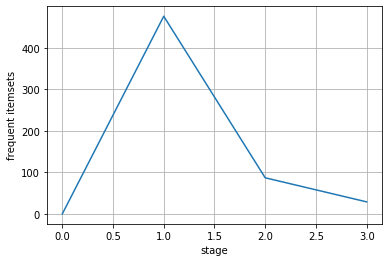

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.array(stage), np.array(size))
plt.ylabel("frequent itemsets")
plt.xlabel("stage")
plt.grid()
plt.show()

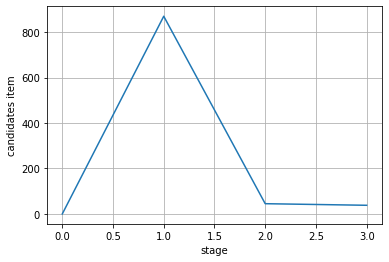

In [26]:
plt.plot(np.array(stage), np.array(candidat))
plt.ylabel("candidates item")
plt.xlabel("stage")
plt.grid()
plt.show()

### TODO fare funziona unica (con 4 stage o far decidere utente o finchè non arriva a zero) + Parser
### TODO spostare fuori dal notebook (?) -> A me piace così
### TODO grafico del tempo
### TODO report